In [ ]:
#Iniciando o projeto e criando os datasets para a criação da prova de conceito
import numpy
import pandas as pd

receitas = pd.read_csv("https://media.githubusercontent.com/media/PedroCosDi/ProjetoAplicadoMack3/main/Dataset/RAW_recipes.csv")

interacoes = pd.read_csv ("https://media.githubusercontent.com/media/PedroCosDi/ProjetoAplicadoMack3/main/Dataset/RAW_interactions.csv")

In [ ]:
#escolhendo apenas as colunas 'id_receita', 'nome', 'minutos' e 'número de ingredientes' do dataset com as receitas
receitas = receitas[['id', 'name', 'minutes', 'n_ingredients']]

receitas.rename(columns={'id' : 'ID_RECEITA', 'name': 'NOME_RECEITA', 'minutes' : 'MINUTOS', 'n_ingredients': 'N_INGREDIENTES'}, inplace= True)
receitas.head()

<ipython-input-2-516aa9e7dd62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receitas.rename(columns={'id' : 'ID_RECEITA', 'name': 'NOME_RECEITA', 'minutes' : 'MINUTOS', 'n_ingredients': 'N_INGREDIENTES'}, inplace= True)


,ID_RECEITA,NOME_RECEITA,MINUTOS,N_INGREDIENTES
0,137739,arriba baked winter squash mexican style,55,7
1,31490,a bit different breakfast pizza,30,6
2,112140,all in the kitchen chili,130,13
3,59389,alouette potatoes,45,11
4,44061,amish tomato ketchup for canning,190,8


In [ ]:
#escolhendo apenas as colunas 'id de usuário', 'id da receita' e 'avaliação' do dataset com as avaliações.
interacoes = interacoes[['user_id', 'recipe_id', 'rating']]
interacoes.rename(columns={'user_id' : 'ID_USUARIO', 'recipe_id': 'ID_RECEITA', 'rating' : 'AVALIACAO'}, inplace= True)
interacoes.head()

<ipython-input-3-c1f9a03e7fdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interacoes.rename(columns={'user_id' : 'ID_USUARIO', 'recipe_id': 'ID_RECEITA', 'rating' : 'AVALIACAO'}, inplace= True)


,ID_USUARIO,ID_RECEITA,AVALIACAO
0,38094,40893,4
1,1293707,40893,5
2,8937,44394,4
3,126440,85009,5
4,57222,85009,5


In [ ]:
print(interacoes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   ID_USUARIO  1132367 non-null  int64
 1   ID_RECEITA  1132367 non-null  int64
 2   AVALIACAO   1132367 non-null  int64
dtypes: int64(3)
memory usage: 25.9 MB
None


In [ ]:
#verificamos que há 1 valor nulo
receitas.isna().sum()

ID_RECEITA        0
NOME_RECEITA      1
MINUTOS           0
N_INGREDIENTES    0
dtype: int64

In [ ]:
#Dropamos a linha de valor nulo
receitas.dropna(inplace = True)

In [ ]:
#não há valores nulos em interacoes
interacoes.isna().sum()

ID_USUARIO    0
ID_RECEITA    0
AVALIACAO     0
dtype: int64

In [ ]:
#Verificamos quantidade de avaliações
interacoes['ID_USUARIO'].value_counts()

424680        7671
37449         5603
383346        4628
169430        4076
128473        3917
              ... 
244983           1
139446           1
495446           1
113469           1
2001868099       1
Name: ID_USUARIO, Length: 226570, dtype: int64

In [ ]:
#nos preparamos para descartar os usuários com menos de 100 reviews, observamos que temos 1382 usuários
qt_avaliacoes = interacoes['ID_USUARIO'].value_counts() > 99
id_relevante = qt_avaliacoes[qt_avaliacoes].index
id_relevante.shape

(1382,)

In [ ]:
#descartamos todas as reviews que foram feitas por usuários que não tiveram pelo menos 100 reviews.
interacoes = interacoes[interacoes['ID_USUARIO'].isin(id_relevante)]

In [ ]:
#verifica tipo de variável
print(receitas.info())
print()
print(interacoes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231636 entries, 0 to 231636
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_RECEITA      231636 non-null  int64 
 1   NOME_RECEITA    231636 non-null  object
 2   MINUTOS         231636 non-null  int64 
 3   N_INGREDIENTES  231636 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 8.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511886 entries, 3 to 1132365
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   ID_USUARIO  511886 non-null  int64
 1   ID_RECEITA  511886 non-null  int64
 2   AVALIACAO   511886 non-null  int64
dtypes: int64(3)
memory usage: 15.6 MB
None


In [ ]:
#unindo os dois datasets (511886 linhas)
inter_receita = interacoes.merge(receitas, on = 'ID_RECEITA')
inter_receita

,ID_USUARIO,ID_RECEITA,AVALIACAO,NOME_RECEITA,MINUTOS,N_INGREDIENTES
0,126440,85009,5,baked potato toppings,10,13
1,57222,85009,5,baked potato toppings,10,13
2,52282,120345,4,sugared raspberries,10,2
3,124416,120345,0,sugared raspberries,10,2
4,76535,134728,4,kfc honey bbq strips,40,12
...,...,...,...,...,...,...
511881,39835,249924,5,rocky mount nc bbq chicken sandwiches,70,5
511882,496803,249924,5,rocky mount nc bbq chicken sandwiches,70,5
511883,169430,470995,5,perfectly fried shrimps with garlic,8,3
511884,1269180,257796,4,slow cooker garlic chicken with rosemary,440,9


In [ ]:
#Remove duplicidades de usuários que fizeram review de receitas duas vezes, note que não existe, e continuamos com o mesmo número de linhas
inter_receita.drop_duplicates(['ID_USUARIO', 'ID_RECEITA'], inplace = True)
inter_receita

,ID_USUARIO,ID_RECEITA,AVALIACAO,NOME_RECEITA,MINUTOS,N_INGREDIENTES
0,126440,85009,5,baked potato toppings,10,13
1,57222,85009,5,baked potato toppings,10,13
2,52282,120345,4,sugared raspberries,10,2
3,124416,120345,0,sugared raspberries,10,2
4,76535,134728,4,kfc honey bbq strips,40,12
...,...,...,...,...,...,...
511881,39835,249924,5,rocky mount nc bbq chicken sandwiches,70,5
511882,496803,249924,5,rocky mount nc bbq chicken sandwiches,70,5
511883,169430,470995,5,perfectly fried shrimps with garlic,8,3
511884,1269180,257796,4,slow cooker garlic chicken with rosemary,440,9


In [ ]:
#remove o ID_Receita, pois já estamos utilizando o nome da receita
del inter_receita['ID_RECEITA']

In [ ]:
#cria um dataset com as receitas como linhas e os usuários como colunas

receita_nota = inter_receita.pivot_table(columns = 'ID_USUARIO', index = 'NOME_RECEITA', values = 'AVALIACAO', fill_value=0)
receita_nota

ID_USUARIO,1533,1535,2310,2312,3288,4291,4439,4470,4740,5060,...,2206637,2324285,2399085,2549237,2597942,1800054678,1802849661,2000431901,2000498330,2001102678
NOME_RECEITA,,,,,,,,,,,,,,,,,,,,,
0 fat chunky watermelon salsa,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0 point soup ww,0,5,0,0.0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
0 point soup crock pot,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007 martini,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007 cocktail,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zydeco sauce,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zydeco shrimp wrap,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zydeco soup,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#importar método para criar uma matrix sparsa
from scipy.sparse import csr_matrix

receita_nota_sparsa = csr_matrix(receita_nota)

In [ ]:
#importar do SciKit learn o KNN
from sklearn.neighbors import NearestNeighbors

In [ ]:
#modelo preditivo

modelo = NearestNeighbors(algorithm = 'brute')
modelo.fit(receita_nota_sparsa)

NearestNeighbors(algorithm='brute')

In [ ]:
#Previsão de receitas: baked chicken puff

distances, sugestions = modelo.kneighbors(receita_nota.filter(items= ['lemonade made with stevia'], axis = 0).values.reshape(1, -1))

for i in range(len(sugestions)):
  print(receita_nota.index[sugestions[i]])
  print(distances)

Index(['lemonade made with stevia', 'cheese enchiladas with green sauce',
       'cottage cheese', 'muffuletta bread', 'muffuletta sandwiches'],
      dtype='object', name='NOME_RECEITA')
[[ 0.         10.44030651 11.18033989 11.18033989 11.18033989]]


In [ ]:
#Previsão de receitas: french strawberry crepes

distances, sugestions = modelo.kneighbors(receita_nota.filter(items= ['almond cupcakes'], axis = 0).values.reshape(1, -1))

for i in range(len(sugestions)):
  print(receita_nota.index[sugestions[i]])

Index(['almond cupcakes', 'gingerbread breakfast loaf', 'tater tots hotdish',
       'easy  delicious   low carb taco soup',
       'zone style flourless pancakes'],
      dtype='object', name='NOME_RECEITA')


In [ ]:
#teste
distances, sugestions = modelo.kneighbors(receita_nota.filter(items= ['007 cocktail'], axis = 0).values.reshape(1, -1))

for i in range(len(sugestions)):
  print(receita_nota.index[sugestions[i]])
  print(distances)

Index(['hg s complete   utter oatmeal insanity    ww points   3',
       'italian sausage chicken chili',
       'country style pork loin in the crock pot',
       'chocolate chip carrot bread',
       'chicken soft tacos with sauteed onions and apples'],
      dtype='object', name='NOME_RECEITA')
[[0. 0. 0. 0. 0.]]


In [ ]:
distances, sugestions = modelo.kneighbors(receita_nota.filter(items= ['lamb and feta rissoles'], axis = 0).values.reshape(1, -1))

for i in range(len(sugestions)):
  print(receita_nota.index[sugestions[i]])
  print(distances)


Index(['corn muffins with cheese and nuts', 'lime and ginger dressing',
       'simple shrimp cakes', 'spicy cajun butter', 'lamb and feta rissoles'],
      dtype='object', name='NOME_RECEITA')
[[0. 0. 0. 0. 0.]]


In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

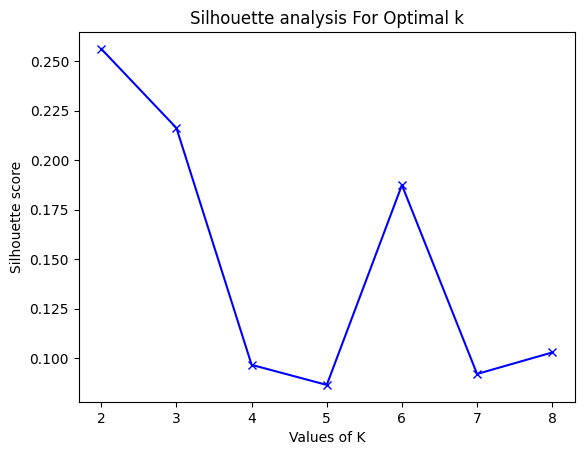

In [ ]:


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

# initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(receita_nota_sparsa)
  cluster_labels = kmeans.labels_

# silhouette score
  silhouette_avg.append(silhouette_score(receita_nota_sparsa, cluster_labels))


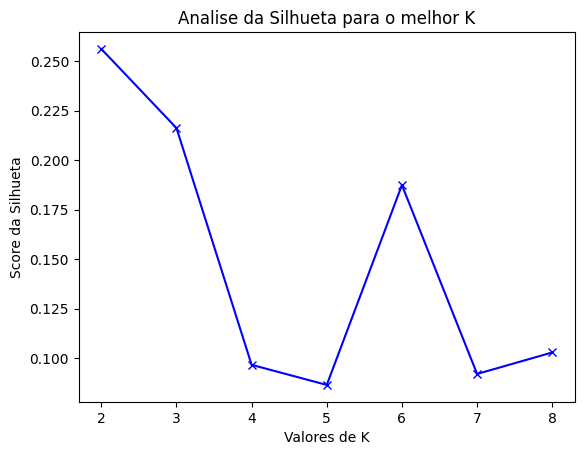

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Score da Silhueta')
plt.title('Analise da Silhueta para o melhor K')
plt.show()

In [ ]:
"""
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
"""
X = receita_nota

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 7.009533283460928
2 : 6.967610393682593
3 : 6.889465209815298
4 : 6.837356877271886
5 : 6.824310253641382
6 : 6.78476965808138
7 : 6.84229225030918
8 : 6.822036245224072
9 : 6.731361765466381


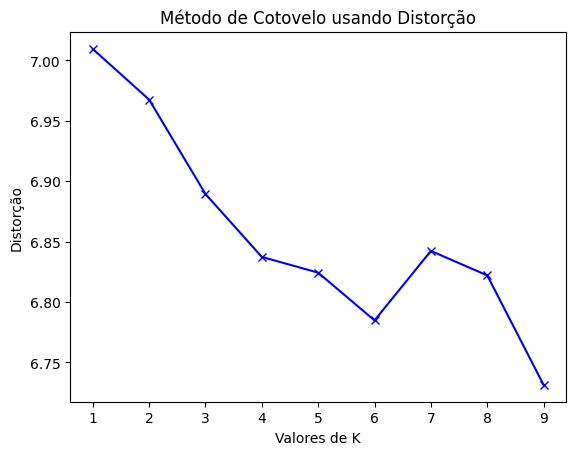

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorção')
plt.title('Método de Cotovelo usando Distorção')
plt.show()

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 11257201.103195839
2 : 11134171.1079792
3 : 10995108.13213588
4 : 10878507.398464425
5 : 10850699.183758333
6 : 10761099.404639341
7 : 10829383.13409797
8 : 10809584.396081205
9 : 10647846.236514632


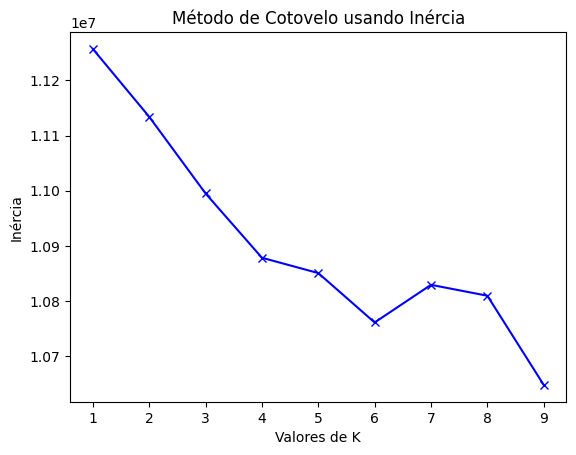

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('Método de Cotovelo usando Inércia')
plt.show()

In [ ]:
1 : 11257201.103195839
2 : 11097612.875810089
3 : 10970491.515952397
4 : 10898903.193420874
5 : 10837861.782322917
6 : 10783103.641227854
7 : 10802767.798928354
8 : 10727953.534321371
9 : 10630296.569618434

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(receita_nota)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

import scipy.cluster.hierarchy as shc

kmeans.cluster_centers_

array([[ 9.10729825e-17,  1.84356071e-02,  9.74453516e-03, ...,
         1.52752173e-02,  6.05741375e-03,  6.58414538e-03],
       [ 3.64088561e-03,  1.85569786e-02,  1.06149763e-02, ...,
         1.11085471e-02,  7.99969232e-03,  3.32038511e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.18063754e-02,  2.44982290e-01,  7.14285714e-02, ...,
         6.61157025e-02,  2.95159386e-02,  4.72255018e-02],
       [-1.96023753e-16,  7.03729768e-03,  3.37790289e-03, ...,
         1.09781844e-02,  3.80014075e-03,  3.51864884e-03],
       [ 2.99102692e-03,  2.35294118e-02,  2.35294118e-02, ...,
         1.67497507e-02,  4.58624128e-03,  3.98803589e-03]])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='single',compute_distances=True).fit(receita_nota)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
clustering_model.distances_